In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [46]:
df = pd.read_csv('../data/full_train_ft_2.csv')

In [47]:
df.shape

(4195, 218)

In [48]:
df = df.dropna(axis=1)
print(df.shape)

(4195, 213)


In [49]:
df = df.drop(columns = df.columns[df.nunique() == 1])
df.shape

(4195, 172)

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['time_to_failure']), df.time_to_failure, test_size=0.2)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3356, 171)
(3356,)
(839, 171)
(839,)


In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
def baseline_model():
    model = Sequential()
    model.add(Dense(64,
                    input_dim=X_train.shape[1],
                    #kernel_initializer='normal',
                    activation='relu'                   
                   ))
    model.add(Dense(1,
                   #kernel_initializer='normal',
                   activation='linear'
                   ))
    model.compile(loss='mse', optimizer='adam')
    return model

In [111]:
seed=2019
np.random.seed(seed)
model = KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=64, verbose=1)

In [112]:
model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test))

Train on 3356 samples, validate on 839 samples
Epoch 1/50
3356/3356 [==============================] - 1s 278us/step - loss: 18.6966 - val_loss: 12.8288
Epoch 2/50
3356/3356 [==============================] - 0s 69us/step - loss: 12.0608 - val_loss: 11.2766
Epoch 3/50
3356/3356 [==============================] - 0s 76us/step - loss: 10.5850 - val_loss: 9.8634
Epoch 4/50
3356/3356 [==============================] - 0s 64us/step - loss: 9.6256 - val_loss: 9.1892
Epoch 5/50
3356/3356 [==============================] - 0s 68us/step - loss: 9.0686 - val_loss: 8.9253
Epoch 6/50
3356/3356 [==============================] - 0s 74us/step - loss: 8.8007 - val_loss: 8.6355
Epoch 7/50
3356/3356 [==============================] - 0s 73us/step - loss: 8.5822 - val_loss: 8.8341
Epoch 8/50
3356/3356 [==============================] - 0s 66us/step - loss: 8.4628 - val_loss: 8.3880
Epoch 9/50
3356/3356 [==============================] - 0s 72us/step - loss: 8.4409 - val_loss: 8.3013
Epoch 10/50
3356/335

# GRID SEARCH

## Algorithms

In [144]:
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(64,
                    input_dim=X_train.shape[1],
                    #kernel_initializer='normal',
                    activation='relu'                   
                   ))
    model.add(Dense(1,
                   #kernel_initializer='normal',
                   activation='linear'
                   ))
    model.compile(loss='mse', optimizer=optimizer)
    return model

In [145]:
model = KerasRegressor(build_fn=create_model, epochs=50, batch_size=64, verbose=1, shuffle=True)

In [146]:
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, verbose=1)
grid_result = grid.fit(X_train_scaled, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:   42.5s finished


Epoch 1/50
3356/3356 [==============================] - 1s 325us/step - loss: 16.4500
Epoch 2/50
3356/3356 [==============================] - 0s 63us/step - loss: 11.2647
Epoch 3/50
3356/3356 [==============================] - 0s 68us/step - loss: 9.7821
Epoch 4/50
3356/3356 [==============================] - 0s 64us/step - loss: 9.1398
Epoch 5/50
3356/3356 [==============================] - 0s 68us/step - loss: 8.6998
Epoch 6/50
3356/3356 [==============================] - 0s 61us/step - loss: 8.5479
Epoch 7/50
3356/3356 [==============================] - 0s 69us/step - loss: 8.3178
Epoch 8/50
3356/3356 [==============================] - 0s 69us/step - loss: 8.2160
Epoch 9/50
3356/3356 [==============================] - 0s 62us/step - loss: 8.0940
Epoch 10/50
3356/3356 [==============================] - 0s 68us/step - loss: 8.1279
Epoch 11/50
3356/3356 [==============================] - 0s 68us/step - loss: 7.9989
Epoch 12/50
3356/3356 [==============================] - 0s 60us/step -

## Learning Rate and Momentum

In [130]:
from keras.optimizers import SGD
def create_model(lr=0.01, momentum=0):
    model = Sequential()
    model.add(Dense(64,
                    input_dim=X_train.shape[1],
                    #kernel_initializer='normal',
                    activation='relu'                   
                   ))
    model.add(Dense(1,
                   #kernel_initializer='normal',
                   activation='linear'
                   ))
    model.compile(loss='mse', optimizer=SGD(lr=lr, momentum=momentum))
    return model

In [131]:
model = KerasRegressor(build_fn=create_model, epochs=50, batch_size=64, verbose=1)

In [132]:
lr = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(lr=lr, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, verbose=1)
grid_result = grid.fit(X_train_scaled, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 3 folds for each of 30 candidates, totalling 90 fits


/home/huypham/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/home/huypham/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  3.0min finished


Epoch 1/50
3356/3356 [==============================] - 1s 256us/step - loss: 15.9370
Epoch 2/50
3356/3356 [==============================] - 0s 57us/step - loss: 9.1777
Epoch 3/50
3356/3356 [==============================] - 0s 57us/step - loss: 8.3251
Epoch 4/50
3356/3356 [==============================] - 0s 60us/step - loss: 8.5354
Epoch 5/50
3356/3356 [==============================] - 0s 54us/step - loss: 8.0242
Epoch 6/50
3356/3356 [==============================] - 0s 54us/step - loss: 8.3384
Epoch 7/50
3356/3356 [==============================] - 0s 58us/step - loss: 8.3934
Epoch 8/50
3356/3356 [==============================] - 0s 56us/step - loss: 8.2491
Epoch 9/50
3356/3356 [==============================] - 0s 52us/step - loss: 8.4118
Epoch 10/50
3356/3356 [==============================] - 0s 48us/step - loss: 8.0667
Epoch 11/50
3356/3356 [==============================] - 0s 57us/step - loss: 8.0135
Epoch 12/50
3356/3356 [==============================] - 0s 53us/step - 

## Activation Function

In [181]:
from keras.optimizers import SGD
def create_model(activation='relu'):
    model = Sequential()
    model.add(Dense(64,
                    input_dim=X_train.shape[1],
                    #kernel_initializer='normal',
                    activation=activation                   
                   ))
    model.add(Dense(1,
                   #kernel_initializer='normal',
                   activation='linear'
                   ))
    model.compile(loss='mse', optimizer='Nadam')
    return model

In [182]:
model = KerasRegressor(build_fn=create_model, epochs=50, batch_size=64, shuffle=True ,verbose=1)

In [183]:
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train_scaled, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/50
3356/3356 [==============================] - 1s 384us/step - loss: 14.7218
Epoch 2/50
3356/3356 [==============================] - 0s 73us/step - loss: 9.8252
Epoch 3/50
3356/3356 [==============================] - 0s 71us/step - loss: 8.8356
Epoch 4/50
3356/3356 [==============================] - 0s 63us/step - loss: 8.5408
Epoch 5/50
3356/3356 [==============================] - 0s 73us/step - loss: 8.3756
Epoch 6/50
3356/3356 [==============================] - 0s 62us/step - loss: 8.2067
Epoch 7/50
3356/3356 [==============================] - 0s 78us/step - loss: 8.1634
Epoch 8/50
3356/3356 [==============================] - 0s 61us/step - loss: 7.9835
Epoch 9/50
3356/3356 [==============================] - 0s 66us/step - loss: 7.9668
Epoch 10/50
3356/3356 [==============================] - 0s 73us/step - loss: 7.8988
Epoch 11/50
3356/3356 [==============================] - 0s 88us/step - loss: 7.8601
Epoch 12/50
3356/3356 [==============================] - 0s 69us/step - 

## Network Weight Initialization

In [152]:
def create_model(init_mode='uniform'):
    model = Sequential()
    model.add(Dense(64,
                    input_dim=X_train.shape[1],
                    #kernel_initializer='normal',
                    activation='tanh',
                    kernel_initializer=init_mode
                   ))
    model.add(Dense(1,
                   #kernel_initializer='normal',
                   activation='linear'
                   ))
    model.compile(loss='mse', optimizer='adam')
    return model

In [153]:
model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=64)

In [154]:
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, verbose=1)
grid_result = grid.fit(X_train_scaled, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.7min finished


Epoch 1/100
3356/3356 [==============================] - 1s 340us/step - loss: 15.9557
Epoch 2/100
3356/3356 [==============================] - 0s 53us/step - loss: 12.2777
Epoch 3/100
3356/3356 [==============================] - 0s 40us/step - loss: 10.5823
Epoch 4/100
3356/3356 [==============================] - 0s 42us/step - loss: 9.3398
Epoch 5/100
3356/3356 [==============================] - 0s 41us/step - loss: 8.7040
Epoch 6/100
3356/3356 [==============================] - 0s 55us/step - loss: 8.4263
Epoch 7/100
3356/3356 [==============================] - 0s 40us/step - loss: 8.3415
Epoch 8/100
3356/3356 [==============================] - 0s 38us/step - loss: 8.1226
Epoch 9/100
3356/3356 [==============================] - 0s 38us/step - loss: 8.0454
Epoch 10/100
3356/3356 [==============================] - 0s 42us/step - loss: 7.9791
Epoch 11/100
3356/3356 [==============================] - 0s 37us/step - loss: 7.9114
Epoch 12/100
3356/3356 [==============================] - 0

## Dropout

In [184]:
from keras.constraints import maxnorm
from keras.layers import Dropout

def create_model(dropout_rate=0.0, weight_constraint=0):
    # create model
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], kernel_initializer='lecun_uniform', activation='softsign', kernel_constraint=maxnorm(weight_constraint)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer='lecun_uniform', activation='linear'))
    # Compile model
    model.compile(loss='mse', optimizer='adam')
    return model

In [185]:
model = KerasRegressor(build_fn=create_model, epochs=50, batch_size=64, verbose=1)

In [186]:
weight_constraint = [1, 3, 5]
dropout_rate = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, verbose=1)
grid_result = grid.fit(X_train_scaled, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:  2.6min finished


Epoch 1/50
3356/3356 [==============================] - 1s 411us/step - loss: 17.6253
Epoch 2/50
3356/3356 [==============================] - 0s 57us/step - loss: 13.7168
Epoch 3/50
3356/3356 [==============================] - 0s 57us/step - loss: 13.1289
Epoch 4/50
3356/3356 [==============================] - 0s 55us/step - loss: 12.1986
Epoch 5/50
3356/3356 [==============================] - 0s 59us/step - loss: 11.0131
Epoch 6/50
3356/3356 [==============================] - 0s 61us/step - loss: 9.9498
Epoch 7/50
3356/3356 [==============================] - 0s 59us/step - loss: 9.2321
Epoch 8/50
3356/3356 [==============================] - 0s 61us/step - loss: 8.8285
Epoch 9/50
3356/3356 [==============================] - 0s 59us/step - loss: 8.6449
Epoch 10/50
3356/3356 [==============================] - 0s 56us/step - loss: 8.5970
Epoch 11/50
3356/3356 [==============================] - 0s 55us/step - loss: 8.4063
Epoch 12/50
3356/3356 [==============================] - 0s 59us/ste

# FINAL MODEL

In [187]:
from keras.constraints import maxnorm
from keras.layers import Dropout

def create_model(activation='relu', init_mode='lecun_uniform', dropout_rate=0.2, weight_constraint=5, optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(64, 
                    input_dim=X_train.shape[1], 
                    kernel_initializer=init_mode, 
                    activation=activation, 
                    kernel_constraint=maxnorm(weight_constraint)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer=init_mode, activation='linear'))
    # Compile model
    model.compile(loss='mse', optimizer=optimizer)
    return model

In [213]:
model = KerasRegressor(build_fn=create_model, epochs=500, batch_size=64, verbose=0, shuffle=True)
model_history=model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test))

In [214]:
pred = model.predict(X_test_scaled)
from sklearn.metrics import mean_squared_error as mse
mse(pred, y_test)

7.544357703112813

In [215]:
model_history.history.keys()

dict_keys(['val_loss', 'loss'])

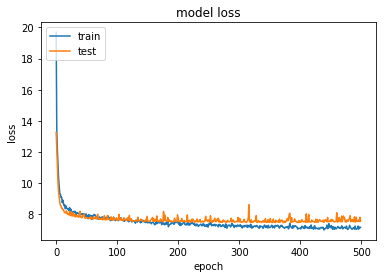

In [216]:
import matplotlib.pyplot as plt
%matplotlib inline
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# SUBMISSION

In [217]:
ft_test = pd.read_csv('ft_big_set_test.csv')
ft_test = ft_test[df.columns[:-1]]

In [218]:
X_sub = scaler.transform(ft_test)

In [219]:
sub_pred = model.predict(X_sub)
sub_pred

array([3.8859687, 5.9117546, 6.34465  , ..., 2.9169452, 2.8073382,
       8.417611 ], dtype=float32)

In [212]:
sub = pd.read_csv('sample_submission.csv')
sub.time_to_failure = sub_pred
sub.to_csv('NN_opt_big_ft_set.csv', index=False)